<a href="https://colab.research.google.com/github/vic-k23/Geekbrains_DS_Python_Libs/blob/Lesson08/Lesson_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочных данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

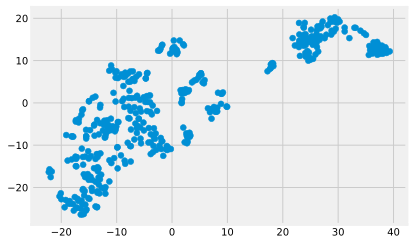

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

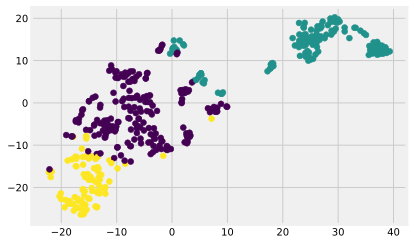

In [23]:
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [24]:
price_mean_0 = y_train[labels_train == 0].mean()
price_mean_1 = y_train[labels_train == 1].mean()
price_mean_2 = y_train[labels_train == 2].mean()

print(price_mean_0, price_mean_1, price_mean_2)

24.958115183246072 16.165354330708663 27.78837209302326


In [26]:
CRIM_mean_0 = X_train.loc[labels_train == 0, 'CRIM'].mean()
CRIM_mean_1 = X_train.loc[labels_train == 1, 'CRIM'].mean()
CRIM_mean_2 = X_train.loc[labels_train == 2, 'CRIM'].mean()

print(CRIM_mean_0, CRIM_mean_1, CRIM_mean_2)

0.42166020942408367 10.797028425196853 0.07356558139534886


***Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [27]:
labels_test = kmeans.predict(X_test_scaled)

price_test_mean_0 = y_test[labels_test == 0].mean()
price_test_mean_1 = y_test[labels_test == 1].mean()
price_test_mean_2 = y_test[labels_test == 2].mean()

CRIM_test_mean_0 = X_test.loc[labels_test == 0, 'CRIM'].mean()
CRIM_test_mean_1 = X_test.loc[labels_test == 1, 'CRIM'].mean()
CRIM_test_mean_2 = X_test.loc[labels_test == 2, 'CRIM'].mean()

print(price_test_mean_0, price_test_mean_1, price_test_mean_2)
print(CRIM_test_mean_0, CRIM_test_mean_1, CRIM_test_mean_2)

21.860784313725492 16.43714285714286 31.35
0.26607882352941176 10.165531142857143 0.062060000000000004


In [29]:
print(price_test_mean_0 - price_mean_0, price_test_mean_1 - price_mean_1, price_test_mean_2 - price_mean_2)
print(CRIM_test_mean_0 - CRIM_mean_0, CRIM_test_mean_1 - CRIM_mean_1, CRIM_test_mean_2 - CRIM_mean_2)

-3.0973308695205795 0.2717885264341966 3.5616279069767423
-0.1555813858946719 -0.6314972823397103 -0.011505581395348852
